# Spotlight CSCI 636: Recommending Articles using Content-based Analysis
_Team Members:_ 
1. Miftahul Jannat Mokarrama, Z1936043
2. Bhavana Ramineni, Z1904418


# Task 1: Setup 
At fisrt, proper environment for this specification is created using necessary modules, files, and libraries 
## System Specification:
Windows 10, 64-bit <br>
Processor: core i7 <br>
python 3.0 <br>
IDE: Anaconda->JupyterLab 2.2.6 <br>

***Note: There may be some variations in command depending on the system specification and versions***

Necessary Libraries:<br>

- **gensim:** An open source python library for natural language processing.
    - *Helpful link:*  
https://www.machinelearningplus.com/nlp/gensim-tutorial/ <br>

- **Spacy:** A free, open-source library for NLP in Python and Cython that is designed to build information extraction or natural language understanding systems providing a concise and user-friendly API. 
    - *Helpful link:* <br>
https://realpython.com/natural-language-processing-spacy-python/ <br>
https://www.analyticsvidhya.com/blog/2020/03/spacy-tutorial-learn-natural-language-processing/

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Below libraries are for feature representation using sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Below libraries are for similarity matrices using sklearn
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances

In [ ]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: idna<3,>=2.5 in c:\users\z1936043\anaconda3\lib\site-packages (from requests<3.0.0,>=2.13.0->spacy) (2.10)



In [ ]:
!python -m spacy download en_core_web_sm 

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Task 2: Data Loading and Exploration

In [ ]:
# read the Dimensions publication data on scholarly articles into a dataframe

import pandas as pd
import csv

data = pd.read_csv('Dimensions Publication.csv') 

C:\Users\Z1936043\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
data.head(3)

,PMCID,Title,Source title,Anthology title,Publisher,MeSH terms,Publication Date,PubYear,Volume,Issue,...,FOR 5,RCDC Categories,RCDC 1,ICRP CSO 5,Units of Assessment,Units of Assessment 1,Units of Assessment 2,Units of Assessment 3,Units of Assessment 4,Units of Assessment 5
0,NaN,Real-Time Identifiability of Power Distributio...,IEEE Control Systems Letters,NaN,Institute of Electrical and Electronics Engine...,NaN,2020-04,2020,4,2,...,NaN,NaN,NaN,NaN,B12 Engineering,B12 Engineering,NaN,NaN,NaN,NaN
1,NaN,Adaptive Optimal Decision in Multi-Agent Rando...,IEEE Control Systems Letters,NaN,Institute of Electrical and Electronics Engine...,NaN,2020-04,2020,4,2,...,NaN,NaN,NaN,NaN,B12 Engineering; B11 Computer Science and Info...,B12 Engineering,B11 Computer Science and Informatics,NaN,NaN,NaN
2,NaN,Tooth morphometry using quasi-conformal theory,Pattern Recognition,NaN,Elsevier,NaN,2020-03,2020,99,NaN,...,0801 Artificial Intelligence and Image Processing,NaN,NaN,NaN,B11 Computer Science and Informatics,B11 Computer Science and Informatics,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PMCID                                  3077 non-null   object 
 1   Title                                  50000 non-null  object 
 2   Source title                           25196 non-null  object 
 3   Anthology title                        27862 non-null  object 
 4   Publisher                              49946 non-null  object 
 5   MeSH terms                             3047 non-null   object 
 6   Publication Date                       50000 non-null  object 
 7   PubYear                                50000 non-null  int64  
 8   Volume                                 27629 non-null  object 
 9   Issue                                  19219 non-null  object 
 10  Open Access                            50000 non-null  object 
 11  Pu

In [ ]:
data.describe()

,PubYear,Times cited,Recent citations,Altmetric,ICRP CSO 5,Units of Assessment 3,Units of Assessment 4,Units of Assessment 5
count,50000.000000,50000.000000,50000.000000,9119.000000,0.0,0.0,0.0,0.0
mean,2015.619460,11.937080,5.780920,13.897248,NaN,NaN,NaN,NaN
std,2.287259,52.854253,33.068327,71.630529,NaN,NaN,NaN,NaN
min,2011.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,2014.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
50%,2016.000000,4.000000,2.000000,3.000000,NaN,NaN,NaN,NaN
75%,2018.000000,10.000000,5.000000,6.000000,NaN,NaN,NaN,NaN
max,2020.000000,5454.000000,3630.000000,3303.000000,NaN,NaN,NaN,NaN


In [ ]:
data.Title.describe()

count                      50000
unique                     49644
top       Editorial introduction
freq                           5
Name: Title, dtype: object

# Task 3: Data Preprocessing


In [ ]:
import re

unique_titles=data.Title.unique()   # series of unique values
new_list=unique_titles.tolist()                  # convert to list of titles
pb_data=pd.DataFrame({'title': unique_titles}) # create new dataframe 'pb_data' with only column 'Title' having unique posts

for i in range(pb_data['title'].count()):
    pb_data.at[i,'title'] = re.sub(r'[^a-zA-Z ]',r'',pb_data['title'][i]) # Keep only alphabetic texts by using regular expression 

In [ ]:
pb_data['title_length']=pb_data.title.str.len() # create new column with corresponding length value of the 'title'

In [ ]:
pb_data.describe()

,title_length
count,49644.000000
mean,74.948594
std,28.070897
min,4.000000
25%,58.000000
50%,73.000000
75%,88.000000
max,913.000000


In [ ]:
# Ignore the warnings related to packages that may arise for version difference of python 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

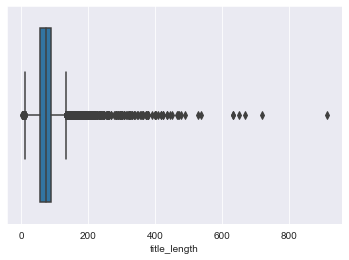

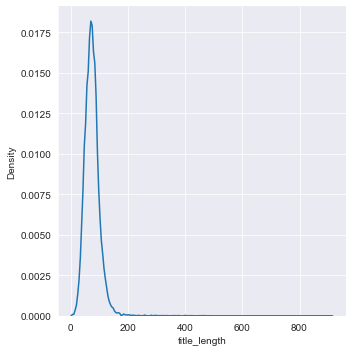

In [ ]:
#visual representation of the density distribution of titles by lengths
import seaborn as sns

sns.set_style(style="darkgrid")
sns.boxplot(pb_data['title_length'])

sns.displot(pb_data['title_length'], kind="kde", bw_adjust=.25)

In [ ]:
pb_data[(pb_data["title_length"]<20)]

,title,title_length
117,The Book of Why,15
439,Foreword,8
1493,Kernel Treelets,15
1684,Smart Manufacturing,19
1921,Perfect Anonymity,17
...,...,...
48324,Smart and Modular,17
48839,MMSE Dimension,14
49312,Sampling Bedrooms,17
49437,Nonlocal Matting,16


In [ ]:
pb_data[(pb_data["title_length"]>130)]

,title,title_length
50,Learning Sparse Neural Networks via and T by a...,132
74,An elasticnet logistic regression approach to ...,138
85,What do we know about volumetric medical image...,132
87,Automated subset identification and characteri...,140
94,The open diffusion data derivatives brain data...,134
...,...,...
49066,Color Demosaicing with Contour StencilsThis ma...,135
49241,Dirichlet Process Mixture Models on Symmetric ...,133
49424,Approximation and Inapproximation for The Infl...,134
49570,Methods for optimizing the performance of dire...,134


In [ ]:
pb_data=pb_data.drop_duplicates()    # remove duplicate entries
data1=pb_data[(pb_data["title_length"]<50) | (pb_data["title_length"]>120) ]  #filter data
pb_data=pb_data.drop(data1.index)    # remove titles having 120<length<15
pb_data.head()

,title,title_length
0,RealTime Identifiability of Power Distribution...,89
1,Adaptive Optimal Decision in MultiAgent Random...,64
3,Design and Modeling of a Continuously Tunable ...,100
4,Discrete Layer Jamming for Variable Stiffness ...,58
5,Discretetime linearquadratic meanfieldtype rep...,102


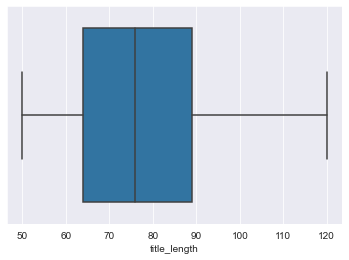

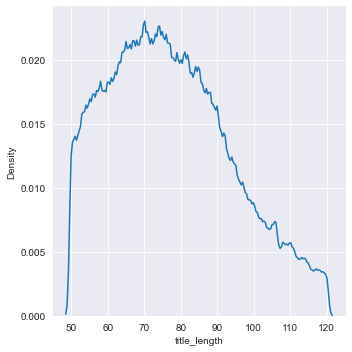

In [ ]:
sns.set_style(style="darkgrid")
sns.boxplot(pb_data['title_length'])

sns.displot(pb_data['title_length'], kind="kde", bw_adjust=.25)

In [ ]:
import gensim, spacy

from gensim import corpora, models
from gensim.utils import simple_preprocess

from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [ ]:
#Since after text preprocessing the original titles will be modified and it doesn't make sense to recommend titles by
#displaying modified titles so we copied the dataset into some other dataset and performed text preprocessing on the later.
pb_data_temp = pb_data.copy()

In [ ]:
#tokenization of each title
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
# get tokenized titles 
tokens_title = list(sent_to_words(pb_data_temp["title"]))

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# method for removing stop words. we used gensim stop-words and added some own stop-words, based on title-texts 
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in gensim.parsing.preprocessing.STOPWORDS.union(set(['also', 'meanwhile','however', 'page', 'research', 
                                                                                                                           'paper', 'suggest', 'use', 'include', 'there',  'soooo']))] for doc in texts]
# method for lemmatization (converting to basic word format from different forms)
def lemmatization(texts, allowed_postags=['NOUN', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# do lemmatization keeping only noun, verb, and adverb
# because adjective is not informative for this task
titles_lemmatized = lemmatization(tokens_title, allowed_postags=['NOUN', 'VERB', 'ADV'])

In [ ]:
# remove stop words after lemmatization
titles_lemmatized = remove_stopwords(titles_lemmatized)

In [ ]:
title_data = pd.DataFrame(columns=['title'])
for i in range(len(titles_lemmatized)):
    title_data.at[i, 'title'] = ' '.join(titles_lemmatized[i])
    


In [ ]:
title_data['length']=title_data.title.str.len() 

In [ ]:
title_data.head()

,title,length
0,identifiability power distribution network top...,62
1,decision multiagent switching,29
2,design modeling continuously stiffness arm hum...,65
3,layer jam stiffness corobot arm,31
4,meanfieldtype repeat game imperfect information,47


In [ ]:
title_data.tail()

,title,length
40428,movement model cellphonebase positioning,40
40429,support network,15
40430,compute jacobian compliance matrix externally ...,56
40431,toolchain programming simulating study archite...,51
40432,ontology integrate information domain patent,44


In [ ]:
title_data.describe()

,length
count,40433.000000
mean,46.003388
std,14.590530
min,4.000000
25%,36.000000
50%,45.000000
75%,55.000000
max,104.000000


# Task 4: Article Recommendation Using Bag-of-Words

In [ ]:
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(title_data['title'])

In [ ]:
pd.set_option('display.max_colwidth', -1) 

In [ ]:
def bag_of_words_based_model(row_index, num_similar_items):
    couple_dist = pairwise_distances(title_features ,title_features [row_index])
    indices = np.argsort(couple_dist.ravel())[0:num_similar_items]
    df = pd.DataFrame({
               'Title':pb_data['title'][indices].values,
                'Euclidean similarity with the queried article': couple_dist[indices].ravel()})
    print("Queried article title details:\n")
    print('Title : ',pb_data['title'][indices[0]])
    print("\nRecommended articles :\n ")
    return df.iloc[1:,]

In [ ]:
bag_of_words_based_model(300,5)

Queried article title details:

Title :  Hypergraphbased connectivity measures for signaling pathway topologies

Recommended articles :
 


,Title,Euclidean similarity with the queried article
1,Largescale interactive numerical experiments of chaos solitons and fractals in real time via GPU in a web browser,2.44949
2,Seeing the elephant Parsimony functionalism and the emergent design of contempt and other sentiments,2.44949
3,ROBIN Using a Programmable Robot to Provide Feedback and Encouragement on Programming Tasks,2.44949
4,A Nearly Tight SumofSquares Lower Bound for the Planted Clique Problem,2.44949


# Task 5 : Article Recommendation Using TF-IDF method

In [ ]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)

#tfidf_title_features
tfidf_title_features = tfidf_title_vectorizer.fit_transform(title_data['title'])


In [ ]:
def tfidf_based_model(row_index, num_similar_items):
    couple_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[row_index])
    indices =np.argsort(couple_dist.ravel())[0:num_similar_items]
    df = pd.DataFrame({
               'Title':pb_data['title'][indices].values,
                'Euclidean similarity with the queried article': couple_dist[indices].ravel()})
    print("Queried article title details:\n")
    print('Title : ',pb_data['title'][indices[0]])
    print("\nRecommended articles :\n ")
    
    return df.iloc[1:,]

In [ ]:
tfidf_based_model(300,5)

Queried article title details:

Title :  Hypergraphbased connectivity measures for signaling pathway topologies

Recommended articles :
 


,Title,Euclidean similarity with the queried article
1,FronthaulAware SoftwareDefined Wireless Networks Resource Allocation and User Scheduling,1.040481
2,Robotassisted smartphone localization for human indoor tracking,1.140169
3,Query Based Adaptive Reranking for Person Reidentification,1.179124
4,Why Are FGM Copulas Successful A Simple Explanation,1.207017


# References:
1. Ricci F, Rokach L, Bracha S, Kantor PB. Recommender Systems Handbook. Boston,
USA: Springer.
2. Lops P, de Gemmis M, Semeraro G. Content-based recommender systems: State of the
art and trends. Recommender Systems Handbook. 1st ed. Boston, USA: Springer, 2011,
pp. 73-105.

3. https://www.alpha-quantum.com/blog/content-based-recommendation-engine/content-
based-recommender-system-with-python/

4. https://towardsdatascience.com/recommending-news-articles-based-on-already-read-
articles-627695221fe8

5. https://thecleverprogrammer.com/2020/10/11/what-is-a-recommendation-system-in-
machine-learning/